In [1]:
import torch
import math
from linear import Linear
from Sequential import Sequential
from module import Module
from dropout import InvertedDropout
from activation import *
from loss import *
from optim import *
from utils import load_data
from metrics import compute_accuracy
from train import train
import matplotlib.pyplot as plt

In [9]:
torch.manual_seed(42)
trainX, trainY, testX, testY = load_data()
net = Sequential([Linear(2, 25),
                  ReLU(),
                  Linear(25, 25),
                  ReLU(),
                  Linear(25, 25),
                  ReLU(),
                  Linear(25, 25),
                  ReLU(),
                  Linear(25, 2)])

losses = train(net, trainX, trainY, input_criterion='mse', input_optimizer='sgd', eta=1e-1, verbose=True)

Epoch 10/250: loss = 0.8515
Epoch 20/250: loss = 0.6840
Epoch 30/250: loss = 0.5676
Epoch 40/250: loss = 0.4731
Epoch 50/250: loss = 0.4332
Epoch 60/250: loss = 0.3840
Epoch 70/250: loss = 0.3203
Epoch 80/250: loss = 0.2741
Epoch 90/250: loss = 0.2328
Epoch 100/250: loss = 0.1763
Epoch 110/250: loss = 0.1557
Epoch 120/250: loss = 0.1423
Epoch 130/250: loss = 0.1574
Epoch 140/250: loss = 0.2204
Epoch 150/250: loss = 0.1901
Epoch 160/250: loss = 0.1327
Epoch 170/250: loss = 0.1686
Epoch 180/250: loss = 0.1171
Epoch 190/250: loss = 0.1780
Epoch 200/250: loss = 0.1285
Epoch 210/250: loss = 0.1479
Epoch 220/250: loss = 0.1156
Epoch 230/250: loss = 0.1257
Epoch 240/250: loss = 0.1192
Epoch 250/250: loss = 0.0778


In [10]:
compute_accuracy(net, trainX, trainY), compute_accuracy(net, testX, testY)

(tensor(0.9810), tensor(0.9700))

In [11]:
# A quick correlation matrix for the fans

pred = net(testX).argmax(1)

b00 = (pred == 0) & (testY.argmax(1) == 0)
b01 = (pred == 0) & (testY.argmax(1) == 1)
b10 = (pred == 1) & (testY.argmax(1) == 0)
b11 = (pred == 1) & (testY.argmax(1) == 1)

print(b00.sum(), b01.sum(), b10.sum(), b11.sum())

tensor(491) tensor(26) tensor(4) tensor(479)


In [12]:
torch.tensor([[b00.sum(), b01.sum()], [b10.sum(), b11.sum()]]).shape

torch.Size([2, 2])

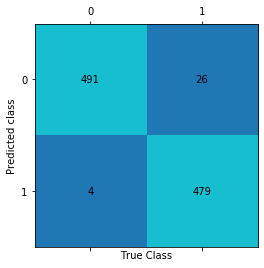

In [13]:
corr = torch.tensor([[b00.sum(), b10.sum()], [b01.sum(), b11.sum()]])

plt.matshow(corr, cmap='tab10')

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(i, j, '{:d}'.format(corr[i,j]), ha='center', va='center')

plt.xlabel('True Class')
plt.ylabel('Predicted class')
plt.show()

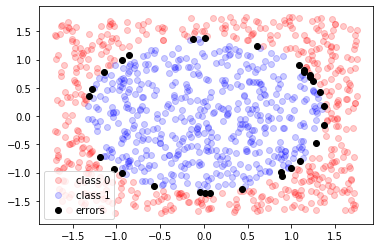

In [14]:
# Plotting scattering of correctly (resp. falsely) predicted values 

correct0 = torch.nonzero(b00==True)
correct1 = torch.nonzero(b11==True)
plt.scatter(testX[correct0,0], testX[correct0, 1], c='r', alpha=0.2, label='class 0')
plt.scatter(testX[correct1,0], testX[correct1, 1], c='b', alpha=0.2, label='class 1')
errors = torch.cat((torch.nonzero(b01==True), torch.nonzero(b10 == True)), dim=0)
plt.scatter(testX[errors,0], testX[errors, 1], c='k', label='errors')
plt.legend()
plt.show()